<a href="https://colab.research.google.com/github/HagarIbrahiem/Data-Analysis-On-Daily-Public-Opinion-on-Israel-Palestine-War/blob/main/Daily_Public_Opinion_on_Israel_Palestine_War.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About This Notebook !

The dataset comprises of over XXXXX tweets on australian elections between the time XXXX and XXXX.


These are short descriptions provide an overview of the information captured in each column of dataset obtained from the Reddit API.

1. `comment_id`: Unique identifier for each comment.
2. `score`: Score assigned to the comment by Reddit users, It's the number of upvotes minus the number of downvotes.
3. `self_text`: Text content of the comment.
4. `subreddit`: Subreddit where the comment was posted,
Subreddits are subsidiary threads or categories within the Reddit website. They allow users to focus on a specific interest or topic in posting content
5. `created_time`: Timestamp indicating when the comment was created.
6. `post_id`: Unique identifier for the post associated with the comment.
7. `author_name`: Username of the author who posted the comment.
8. `controversiality`: It's a Boolean value indicating whether or not a comment has received a similar amount of upvotes to downvotes, hence being controversial.
9. `ups`: Number of upvotes received by the comment.
10. `downs`: Number of downvotes received by the comment.
11. `user_is_verified`: Indicates whether the user account is verified.
12. `user_account_created_time`: Timestamp indicating when the user account was created.
13. `user_awardee_karma`:
Reddit karma is a user score that represents how much you've contributed to the Reddit community.Awardee Karma is when someone gives you an award. You will get around 10 awardee karma each time someone gives you an award. And yes it still adds to your total karma..
14. `user_awarder_karma`: Karma received as an awarder.
15. `user_link_karma`: Karma received from links posted.
16. `user_comment_karma`: Karma received from comments made.
17. `user_total_karma`: Total karma received by the user.
18. `post_score`: Score assigned to the post associated with the comment.
19. `post_self_text`: Text content of the post.
20. `post_title`: Title of the post.
21. `post_upvote_ratio`: Ratio of upvotes to total votes for the post.
22. `post_thumbs_ups`: Number of upvotes received by the post.
23. `post_total_awards_received`: Total number of awards received by the post.
24. `post_created_time`: Timestamp indicating when the post was created.



# Libs & Utilities 🔌🔧

In [13]:
import pandas as pd
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt


import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [14]:
# download nltk corpus (first time only)
nltk.download([
"names",
"stopwords",
"vader_lexicon",
"punkt",
"wordnet"
])
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
## Checking missing values using nulls_summary_table function

def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage

    Parameters:
    df (DataFrame): Dataframe to check

    Returns:
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = (null_values[0]/len(df) ) *100
    null_values.columns = ['null_count','null_percentage']
    return null_values

# Load Data

In [16]:
#Make directory name kaggle
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
#Copy the json kaggle to this directory
! cp kaggle.json ~/.kaggle/

In [18]:
#Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [19]:
#Downloading dataset not part from any competition
! kaggle datasets download asaniczka/reddit-on-israel-palestine-daily-updated

 95% 177M/187M [00:02<00:00, 63.4MB/s]
100% 187M/187M [00:02<00:00, 70.0MB/s]


In [22]:
from zipfile import ZipFile

# specifying the name of the zip file
file = "/content/reddit-on-israel-palestine-daily-updated.zip"

# open the zip file in read mode
with ZipFile(file, 'r') as _zip:
    # extract all files to another directory
    _zip.extractall('Datasets')

In [104]:
df_original =pd.read_csv( '/content/Datasets/reddit_opinion_PSE_ISR.csv')
df = df_original.copy()

# Getting Closer Look

In [105]:
df.head(2)

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,kc0sk40,1,What is written on the wall underneath the sta...,Palestine,2023-12-04 23:19:31,18apkai,my_shitty_sketches,0,1,0,...,3814.0,948.0,4843.0,669,NaN,Israel soldiers are riding the bikes of the ch...,0.96,669,0,2023-12-04 17:43:44
1,kc0sjxr,1,There is evidence that Israeli intelligence di...,worldnews,2023-12-04 23:19:29,18awi3x,chessc,0,1,0,...,73322.0,101282.0,183814.0,44,NaN,Someone bet against the Israeli stock market i...,0.87,44,0,2023-12-04 22:40:07


In [106]:
df.shape

(356771, 24)

In [107]:
df.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time',
       'post_id', 'author_name', 'controversiality', 'ups', 'downs',
       'user_is_verified', 'user_account_created_time', 'user_awardee_karma',
       'user_awarder_karma', 'user_link_karma', 'user_comment_karma',
       'user_total_karma', 'post_score', 'post_self_text', 'post_title',
       'post_upvote_ratio', 'post_thumbs_ups', 'post_total_awards_received',
       'post_created_time'],
      dtype='object')

In [108]:
df.dtypes

comment_id                     object
score                           int64
self_text                      object
subreddit                      object
created_time                   object
post_id                        object
author_name                    object
controversiality                int64
ups                             int64
downs                           int64
user_is_verified               object
user_account_created_time      object
user_awardee_karma            float64
user_awarder_karma            float64
user_link_karma               float64
user_comment_karma            float64
user_total_karma              float64
post_score                      int64
post_self_text                 object
post_title                     object
post_upvote_ratio             float64
post_thumbs_ups                 int64
post_total_awards_received      int64
post_created_time              object
dtype: object

**Convert Date Fields from Object to Datetime**

In [109]:
# convert to datetime using pd.to_datetime
df['created_time'] = pd.to_datetime(df['created_time'])
df['user_account_created_time'] = pd.to_datetime(df['user_account_created_time'])
df['post_created_time'] = pd.to_datetime(df['post_created_time'])

df.dtypes

comment_id                            object
score                                  int64
self_text                             object
subreddit                             object
created_time                  datetime64[ns]
post_id                               object
author_name                           object
controversiality                       int64
ups                                    int64
downs                                  int64
user_is_verified                      object
user_account_created_time     datetime64[ns]
user_awardee_karma                   float64
user_awarder_karma                   float64
user_link_karma                      float64
user_comment_karma                   float64
user_total_karma                     float64
post_score                             int64
post_self_text                        object
post_title                            object
post_upvote_ratio                    float64
post_thumbs_ups                        int64
post_total

Let's review the dates range in the dataset

In [110]:
print ('Min Date: ',df.post_created_time.min())
print ('Max Date: ',df.post_created_time.max())

Min Date:  2023-09-02 11:52:49
Max Date:  2023-12-04 23:12:24


**Filter dataset starting from '2023-10-07'**

In [111]:
print('Len. of data before' ,len(df))
# Select data starting from '2023-10-07'
start_date = pd.to_datetime('2023-10-07')
filtered_df = df[df['post_created_time'] >= start_date]
print('Len. of data After',len(filtered_df))

Len. of data before 356771
Len. of data After 354070


**Check Null Values**

In [112]:
## Get total number of missing values for all the dataset
filtered_df.isnull().sum().sum()

191026

In [113]:
## Checking missing values using nulls_summary_table function
nulls_summary_table(filtered_df)

,null_count,null_percentage
comment_id,0,0.000000
score,0,0.000000
self_text,1,0.000282
subreddit,0,0.000000
created_time,0,0.000000
post_id,0,0.000000
author_name,0,0.000000
controversiality,0,0.000000
ups,0,0.000000
downs,0,0.000000


**let's visualize the missing values spread in the dataset.**

<Axes: >

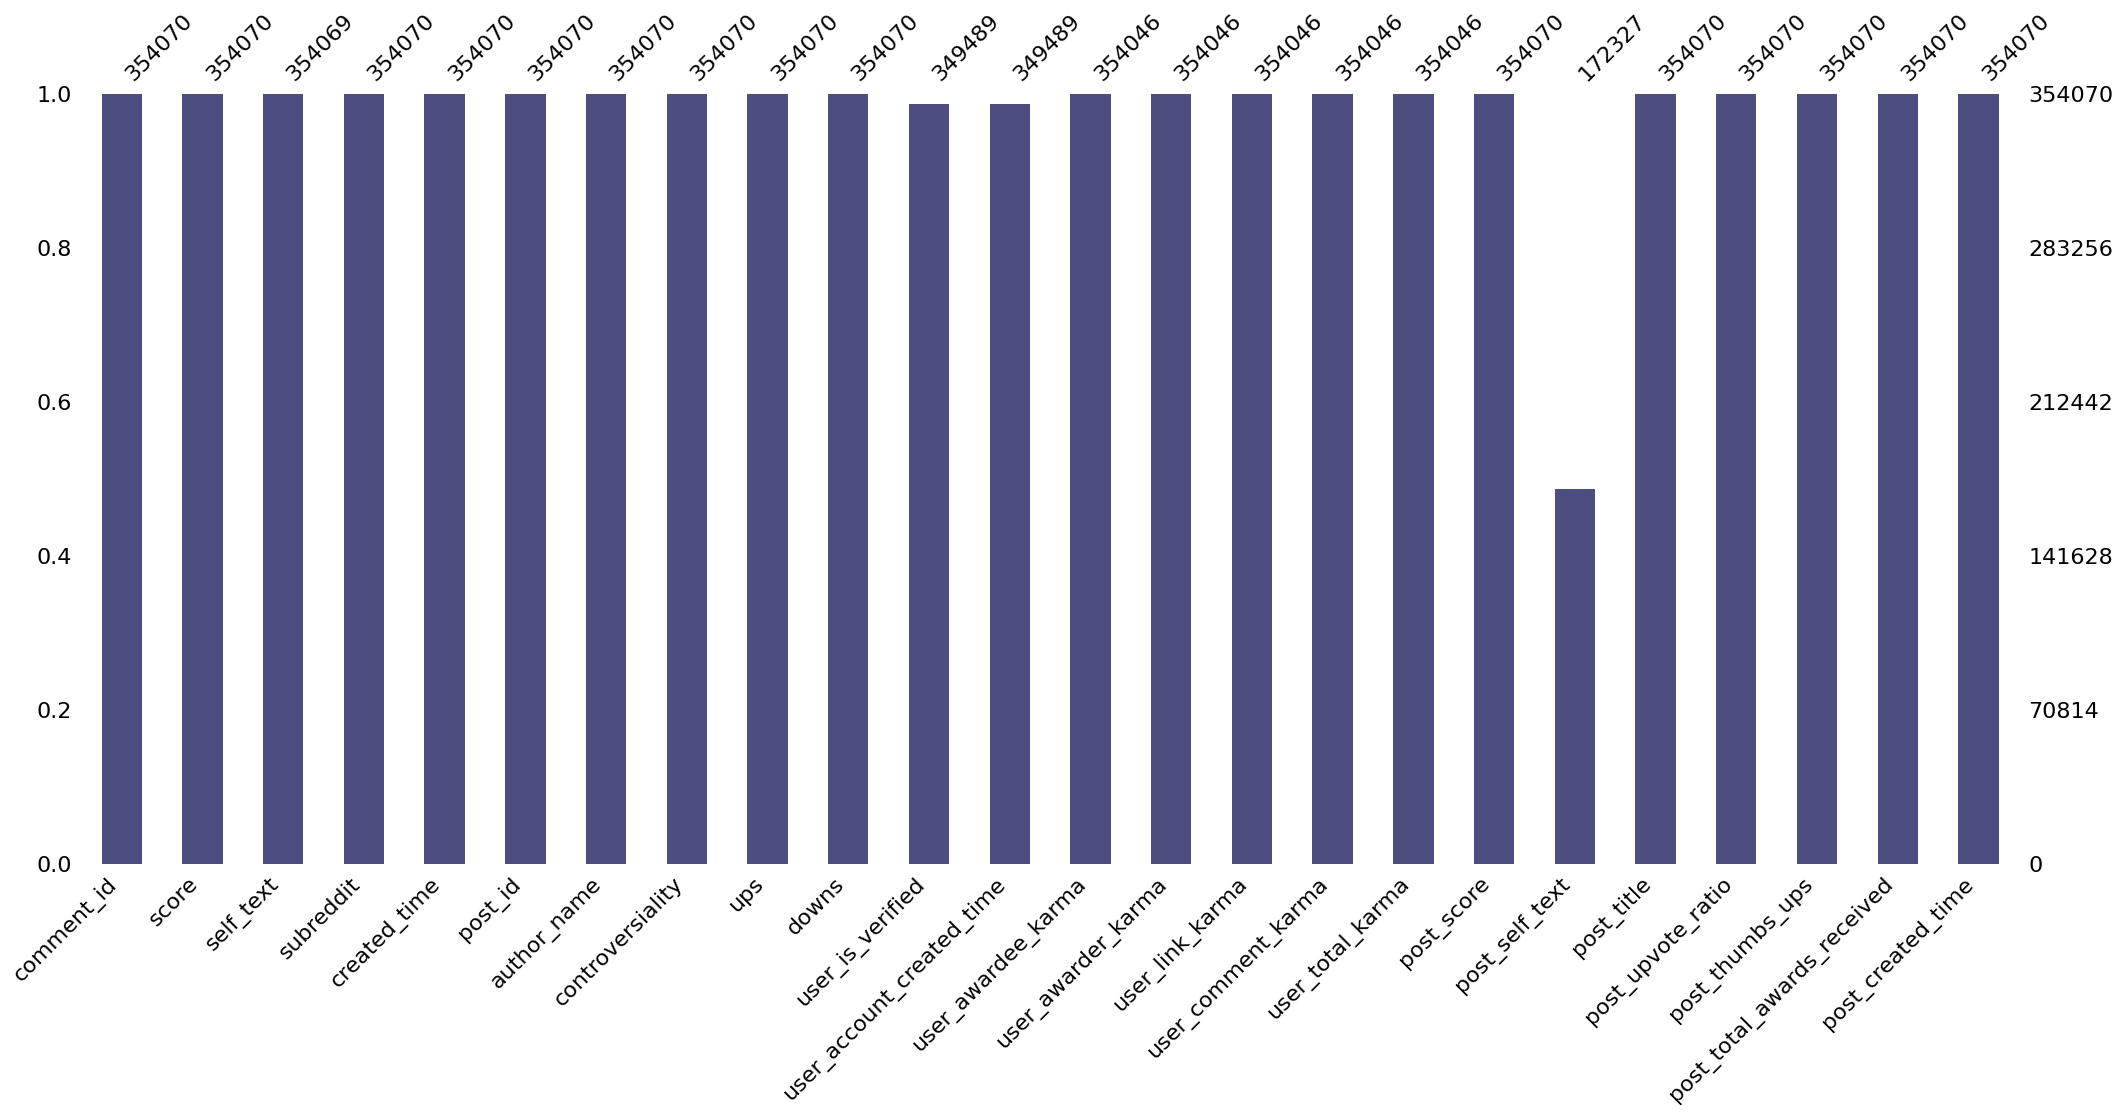

In [114]:
msno.bar(filtered_df, color=(0.3,0.3,0.5))

# Getting Insights

In [115]:
# Calculate the difference between max_date and min_date
date_difference = filtered_df.post_created_time.max() - filtered_df.post_created_time.min()

# Calculate years, months, and days
years = date_difference.days // 365
months = (date_difference.days % 365) // 30
days = (date_difference.days % 365) % 30

# Display the result
result = f"{years} years, {months} months, {days} days"
print(result)

0 years, 1 months, 28 days


**Popular Subreddits**

Identify the most popular subreddits based on the number of posts or comments.

In [116]:
popular_subreddits = filtered_df['subreddit'].value_counts().reset_index()
popular_subreddits.columns=['subreddit', 'count']
popular_subreddits

,subreddit,count
0,IsraelPalestine,139311
1,worldnews,56452
2,CombatFootage,30368
3,AskMiddleEast,28936
4,PublicFreakout,28013
5,Palestine,25297
6,worldnewsvideo,14969
7,NonCredibleDefense,12848
8,IsrealPalestineWar_23,10208
9,CrazyFuckingVideos,3786


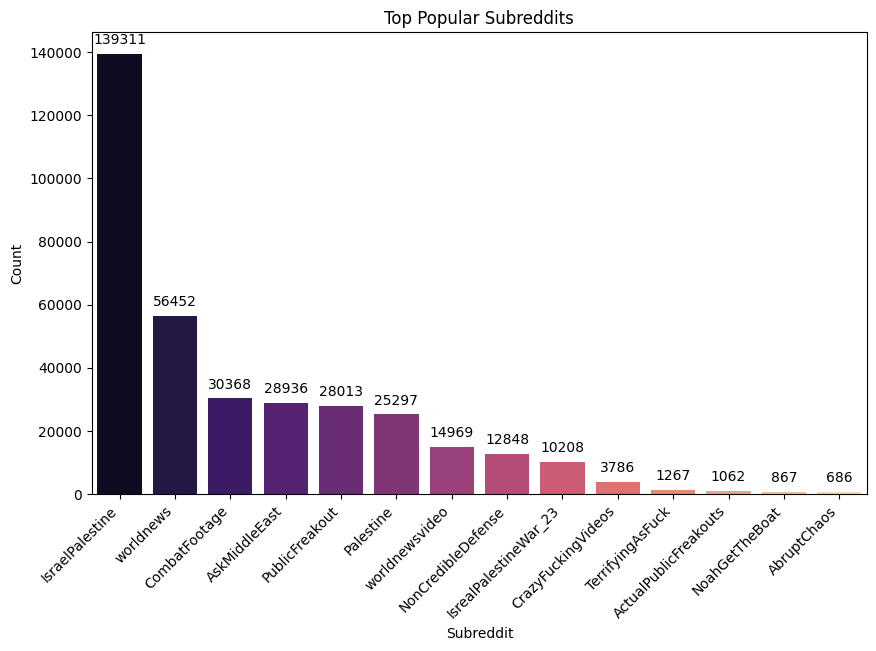

In [117]:
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='subreddit', y='count', data=popular_subreddits, palette='magma')

# Annotate each bar with its count
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10),
                     textcoords='offset points')

plt.title('Top Popular Subreddits')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

**Temporal Trends**

Explore temporal trends by analyzing the frequency of posts or comments over time.

In [118]:
temporal_trends =pd.DataFrame(filtered_df.set_index('created_time').resample('D').size())
temporal_trends.columns=['Comments_counts_per_day']
temporal_trends = temporal_trends.reset_index()  # Resetting index to make 'created_time' a column
temporal_trends.sort_values(by=['Comments_counts_per_day'], ascending=False).head(10)


,created_time,Comments_counts_per_day
43,2023-11-19,14043
39,2023-11-15,13828
46,2023-11-22,13524
38,2023-11-14,13446
41,2023-11-17,12981
42,2023-11-18,12703
40,2023-11-16,12532
45,2023-11-21,12492
44,2023-11-20,12132
55,2023-12-01,11654


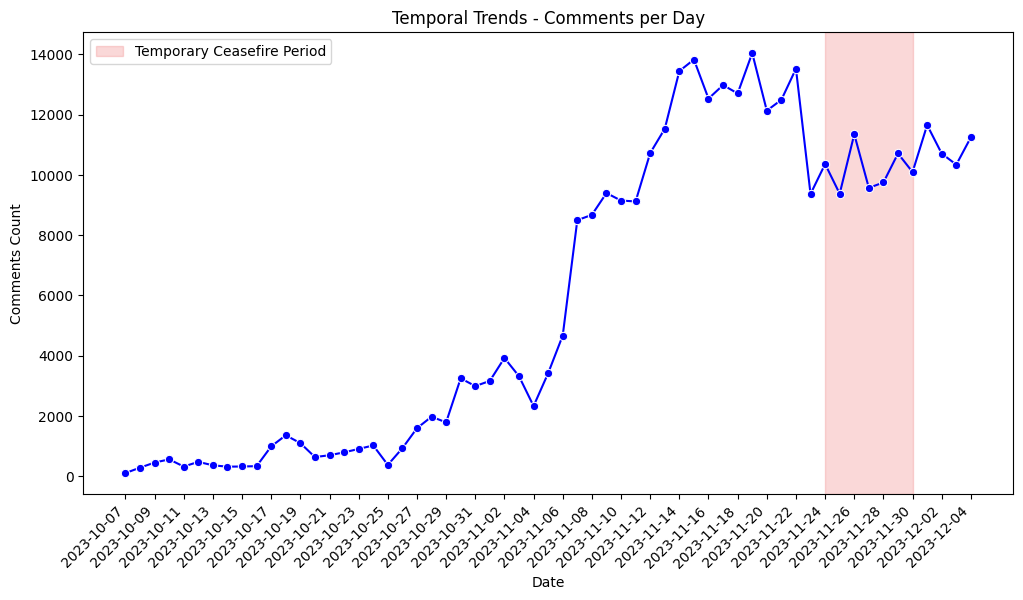

In [119]:

# Plotting using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=temporal_trends['created_time'], y='Comments_counts_per_day', data=temporal_trends, marker='o', color='blue')

# Set x-axis labels rotation
plt.xticks(rotation=45, ha='right')

# Highlight the time period from 24 November 2023 to 30 November 2023 in a different color
highlight_start_date = pd.Timestamp('2023-11-24')
highlight_end_date = pd.Timestamp('2023-11-30')

ax.axvspan(highlight_start_date, highlight_end_date, color='lightcoral', alpha=0.3, label='Temporary Ceasefire Period')

# Set x-axis ticks to display only every other day
even_dates = temporal_trends['created_time'][::2]
plt.xticks(even_dates)

plt.title('Temporal Trends - Comments per Day')
plt.xlabel('Date')
plt.ylabel('Comments Count')
plt.legend()

plt.show()

**User Activity**

Analyze user activity by counting the number of posts or comments made by each user.

In [120]:
user_activity = filtered_df['author_name'].value_counts().reset_index()
user_activity.columns=['author_name', 'count']
user_activity

,author_name,count
0,[deleted],1621
1,Queasy_Ad_7297,1099
2,Special-Quantity-469,904
3,JosephL_55,861
4,JeffB1517,648
...,...,...
75036,the-electricgigolo,1
75037,DesireForHappiness,1
75038,rikwebster,1
75039,Good_Smell6266,1


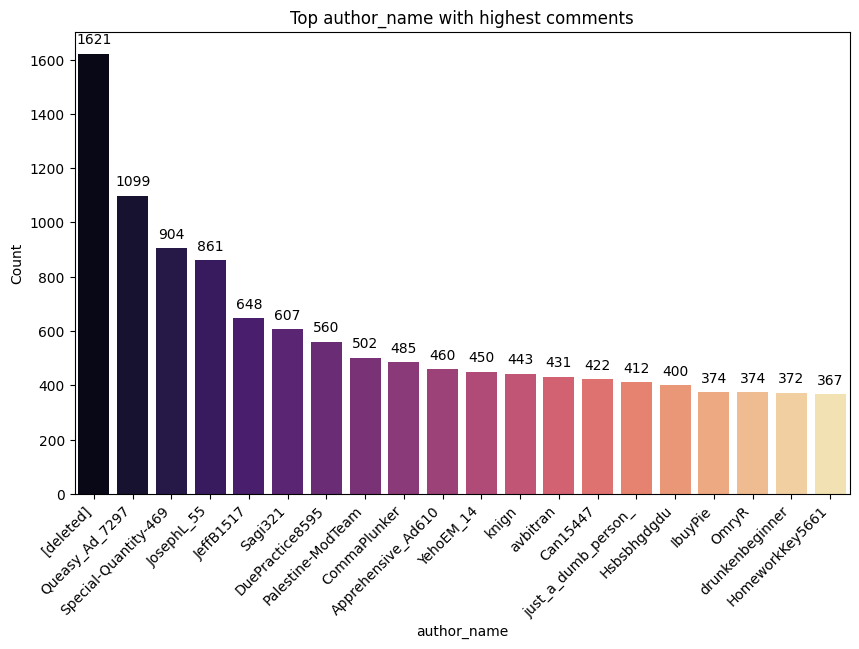

In [121]:
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
barplot= sns.barplot(x='author_name', y='count', data=user_activity[:20], palette='magma')

# Annotate each bar with its count
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10),
                     textcoords='offset points')

plt.title('Top author_name with highest comments')
plt.xlabel('author_name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

**Identify user_total_karma for each author_name per user_activity**

In [122]:
# Create an empty dictionary to store author_name and user_total_karma mapping
author_karma_dict = {}

# Iterate over rows in filtered_df and populate the dictionary
for index, row in filtered_df.iterrows():
    author_name = row['author_name']
    user_total_karma = row['user_total_karma']
    # Check if the author_name is not already in the dictionary to avoid redundancy
    if author_name not in author_karma_dict:
        author_karma_dict[author_name] = user_total_karma

# Add a new column 'user_total_karma' to user_activity using the mapping
user_activity['user_total_karma'] = user_activity['author_name'].map(author_karma_dict).fillna(0).astype(int)
user_activity

,author_name,count,user_total_karma
0,[deleted],1621,0
1,Queasy_Ad_7297,1099,2712
2,Special-Quantity-469,904,5194
3,JosephL_55,861,100450
4,JeffB1517,648,91782
...,...,...,...
75036,the-electricgigolo,1,16904
75037,DesireForHappiness,1,82560
75038,rikwebster,1,30317
75039,Good_Smell6266,1,16


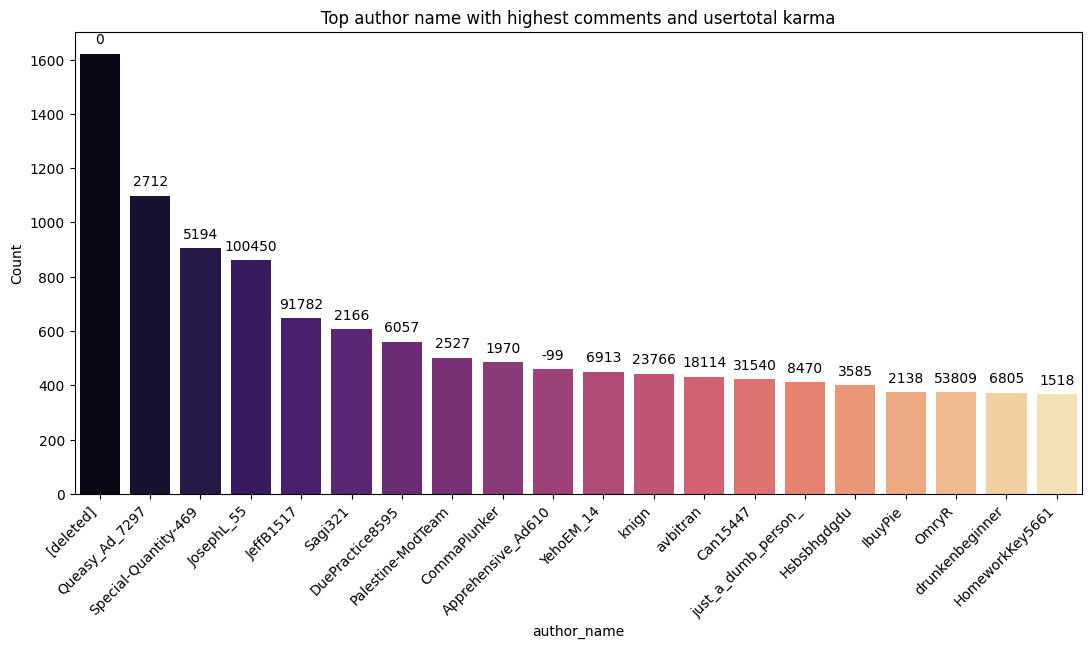

In [123]:
# Plotting using Seaborn
plt.figure(figsize=(13, 6))
barplot = sns.barplot(x='author_name', y='count', data=user_activity[:20], palette='magma')

# Annotate each bar with its count
for patch, count in zip (barplot.patches, user_activity['user_total_karma'][:20]):
    barplot.annotate(f'{count}',
                     (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                     ha='center', va='center', xytext=(0, 10),
                     textcoords='offset points')

plt.title('Top author name with highest comments and usertotal karma')
plt.xlabel('author_name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [124]:
# List of specific authors
specific_authors = ['[deleted]', 'Queasy_Ad_7297']

# Map user_account_created_time for specific authors
specific_authors_created_time = filtered_df.loc[filtered_df['author_name'].isin(specific_authors), ['author_name', 'user_account_created_time']]
specific_authors_created_time.drop_duplicates()

,author_name,user_account_created_time
44,Queasy_Ad_7297,2023-10-31 18:53:40
3461,[deleted],NaT


**Getting the oldest and newest Reddit member in the dataset**

In [125]:
print('The oldest user in the data was',filtered_df.loc[filtered_df['user_account_created_time'] == filtered_df.user_account_created_time.min(),
                                                        'author_name'].values, 'whose account created at', filtered_df.user_account_created_time.min())

print('The newest user in the data was',filtered_df.loc[filtered_df['user_account_created_time'] == filtered_df.user_account_created_time.max(),
                                                        'author_name'].values, 'whose account created at', filtered_df.user_account_created_time.max())

The oldest user in the data was ['kanzenryu'] whose account created at 2005-08-07 04:00:00
The newest user in the data was ['Hopeful-Property953' 'Hopeful-Property953' 'Hopeful-Property953'
 'Hopeful-Property953'] whose account created at 2023-12-04 22:53:02


In [126]:
# Filter users created after October 7, 2023
new_users = filtered_df.loc[filtered_df['user_account_created_time'] > pd.to_datetime('2023-10-07')]

# Print information about the new users
print(f'The users created after October 7, 2023 are:\n{new_users[["author_name", "user_account_created_time"]]}')

The users created after October 7, 2023 are:
                author_name user_account_created_time
19           ChloeFromSpace       2023-10-13 00:20:17
26            PikachuStatue       2023-10-29 21:00:12
44           Queasy_Ad_7297       2023-10-31 18:53:40
45              painprophet       2023-10-13 16:17:29
60      Hopeful-Property953       2023-12-04 22:53:02
...                     ...                       ...
353717          aminastaxks       2023-10-08 22:18:21
353739    Cool_Parsley_6279       2023-10-08 19:29:15
353741    Cool_Parsley_6279       2023-10-08 19:29:15
353743    Cool_Parsley_6279       2023-10-08 19:29:15
353745    Cool_Parsley_6279       2023-10-08 19:29:15

[22762 rows x 2 columns]


**For transparency reasons ,filtered_df will be updated to only include records where user account created time is on or before  the start of the military operations on Oct. 7.**

In [127]:
len_before= len(filtered_df)
print('len. of Dataframe before:',len_before)

# Filter records created on or before October 7, 2023
filtered_df = filtered_df[filtered_df['user_account_created_time'] <= pd.to_datetime('2023-10-07')]

len_after= len(filtered_df)
print('len. of Dataframe after:',len(filtered_df))

# Print the len of the DataFrame
print('Num. of Comments made by accounts created after 7 October 2023:' ,len_before-len_after )

len. of Dataframe before: 354070
len. of Dataframe after: 326727
Num. of Comments made by accounts created after 7 October 2023: -27343


# Split DataSet

In [95]:
# Create a DataFrame for comments
df_comments = filtered_df[filtered_df['self_text'].notnull()]

# Create a DataFrame for posts
df_posts = filtered_df[filtered_df['post_self_text'].notnull()]

# Keep mutual columns in both DataFrames
mutual_columns = ['subreddit', 'user_is_verified', 'user_account_created_time',
                  'user_awardee_karma', 'user_awarder_karma', 'user_link_karma']

df_comments = df_comments[mutual_columns + ['comment_id', 'score', 'self_text', 'created_time',
                                             'post_id', 'author_name', 'controversiality', 'ups', 'downs',
                                             'user_comment_karma', 'user_total_karma']]

df_posts = df_posts[mutual_columns + ['post_id', 'post_score', 'post_self_text', 'post_title',
                                       'post_upvote_ratio', 'post_thumbs_ups', 'post_total_awards_received',
                                       'post_created_time']]

In [96]:
print("\nPosts DataFrame:", len(df_posts))
print("Comments DataFrame:", len(df_comments))


Posts DataFrame: 153032
Comments DataFrame: 326726


**Check for duplicate records in df_posts**

In [97]:
# Assuming df_posts is your DataFrame
original_rows = df_posts.shape[0]

# Drop entirely duplicated rows
df_posts_no_duplicates = df_posts.drop_duplicates()

# Count how many rows were removed
print(f"Number of duplicate rows removed (Duplicate Posts): {original_rows - df_posts_no_duplicates.shape[0]}")


Number of duplicate rows removed (Duplicate Posts): 85879


**Check for duplicate records in df_comments**

In [98]:
# Assuming df_comments is your DataFrame
original_rows = df_comments.shape[0]

# Drop entirely duplicated rows
df_comments_no_duplicates = df_comments.drop_duplicates()

# Count how many rows were removed
print(f"Number of duplicate rows removed: {original_rows - df_comments_no_duplicates.shape[0]}")


Number of duplicate rows removed: 0


In [99]:
print("\nPosts DataFrame:", len(df_posts))
print("Comments DataFrame:", len(df_comments))


Posts DataFrame: 153032
Comments DataFrame: 326726


# Topic Modeling - Posts Dataframe

# Sentiment Analysis - Comments Dataframe

# Refrences


[link text](https://www.kaggle.com/datasets/asaniczka/reddit-on-israel-palestine-daily-updated)

[link text](https://zapier.com/blog/how-to-get-karma-on-reddit/)

[link text](https://www.kaggle.com/code/gvyshnya/ukraine-war-sentiments-and-topics)